<a href="https://colab.research.google.com/github/SaimaheshGangisetty/AmazonPrime-TVShows-Movies-EDA-Project/blob/main/AmazonPrime_TVShows_Movies_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Module-2**


## **Project Name - Exploratory Data Analysis on Amazon Prime TV Shows and Movies**

**Project Type** - EDA

**Contribution** - Individual

# **Project Summary** -

The “Amazon Prime TV Shows and Movies” project analyzes Amazon Prime Video’s content library to uncover key trends, patterns, and insights using Python (Pandas, Matplotlib, Seaborn, Plotly) and an interactive Streamlit web app for Univariate, Bivariate, and Multivariate exploration.

📂 Datasets Used

Titles Dataset: 9,871 records covering title, type, genre, runtime, release year, and ratings.

Credits Dataset: 124,000+ entries detailing actors, directors, and their roles.

🧹 Data Preparation Data was cleaned, standardized, and merged, ensuring accuracy by handling missing values and normalizing categories.

📊 Key Insights

Movies dominate over TV shows.

Drama, Comedy, and Action are top genres.

U.S. and India lead in content production.

High IMDb/TMDB scores correlate with popularity.

Mature-rated content is most common.

🧭 Impact & Conclusion The findings guide content strategy, audience targeting, and regional diversification, proving how data-driven insights can strengthen Amazon Prime Video’s growth, engagement, and competitive edge in the streaming market.

# **GitHub Link -**

**Github Link** :

# **Problem Statement**

The rapid expansion of video streaming platforms has created an environment where data-driven decision-making is critical for sustaining competitive advantage. Amazon Prime Video, with its vast library of movies and TV shows, faces the challenge of understanding its diverse catalog in terms of content diversity, audience preferences, and regional distribution.

The key problems addressed in this project are:

Content Diversity & Trends – What are the dominant genres, formats (movies vs. shows), and age certifications? How has the catalog evolved over the years?

Regional Analysis – Which countries contribute the most to Amazon Prime’s content library? Are certain regions underrepresented or overrepresented?

Audience Reception & Popularity – How do IMDb and TMDB ratings, votes, and popularity scores correlate, and what do they reveal about audience engagement?

Runtime & Release Insights – What patterns emerge in terms of runtime, release years, and seasonal content availability?

Cast & Crew Contributions – Who are the most frequently featured actors and directors, and how do they influence content success?

By addressing these questions, the project aims to transform raw datasets (titles and credits) into a clean, structured, and insightful analysis. The insights generated will not only enhance the understanding of Amazon Prime’s current catalog but also provide strategic guidance for content acquisition, audience targeting, and recommendation systems in the competitive streaming industry.

## **Define Your Business Objective?**

This project aims to analyze Amazon Prime Video’s catalog to uncover insights into audience preferences, content diversity, and market trends.

By exploring genres, regions, release patterns, ratings, and cast/crew data, the goal is to:

Enhance content strategy by identifying high-performing genres and regions.

Boost audience engagement through data-driven recommendations.

Drive business growth by aligning content investments with viewer demand.

# **Let's Begin !**

## **1. Know Your Data**

## Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset Loading

In [3]:
filepath_titles='/content/titles.csv'
filepath_credits='/content/credits.csv'

In [4]:
# Load Dataset
try:
  titles = pd.read_csv(filepath_titles)
  credits = pd.read_csv(filepath_credits)
except Exception as e:
  print('Error loading data')

## Dataset First View

In [5]:
# Dataset First Look
titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6


In [6]:
credits.head()

,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR


## Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
print('Titles Dataset - ', titles.shape)
print('----------------')
print('Credits Dataset - ', credits.shape)

Titles Dataset -  (9871, 15)
----------------
Credits Dataset -  (124235, 5)


## Dataset Information

In [8]:
# Dataset Info
print('Titles Dataset Info:\n')
print(titles.info())
print('----------------\n')
print('Credits Dataset Info:\n')
print(credits.info())

Titles Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtyp

## Duplicate Values

In [9]:
# Dataset Duplicate Value Count
print('Titles Dataset Duplicate Values - ', titles.duplicated().sum())
print('----------------')
print('Credits Dataset Duplicate Values - ', credits.duplicated().sum())

Titles Dataset Duplicate Values -  3
----------------
Credits Dataset Duplicate Values -  56


In [10]:
print('---------Visualising duplicates in titles dataset--------')
titles[titles.duplicated()].sort_values(by = 'id')

---------Visualising duplicates in titles dataset--------


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
722,tm137955,Broken Dreams,MOVIE,Medical intern Robert Morley is distraught aft...,1933,NaN,68,"['drama', 'romance']",['US'],NaN,tt0023849,5.8,74.0,0.600,NaN
720,tm66674,Dynamite,MOVIE,Two members of a dynamite crew--a rugged veter...,1949,NaN,68,"['drama', 'crime']",['US'],NaN,tt0039343,5.0,24.0,0.841,NaN
480,tm89134,The Gunman From Bodie,MOVIE,The Rough Riders are after a gang of rustlers....,1941,NaN,62,['western'],['US'],NaN,tt0033683,5.9,133.0,0.991,7.0


In [11]:
print('---------Visualising duplicates in credits dataset--------')
credits[credits.duplicated()].sort_values(by = 'id')

---------Visualising duplicates in credits dataset--------


,person_id,id,name,character,role
13037,154486,tm137955,Robert G. Vignola,NaN,DIRECTOR
13024,60996,tm137955,Randolph Scott,Dr. Robert Morley,ACTOR
13025,109675,tm137955,Martha Sleeper,Martha Morley,ACTOR
13026,21688,tm137955,Beryl Mercer,Mom,ACTOR
13027,53498,tm137955,Joseph Cawthorn,Pop,ACTOR
13028,74807,tm137955,Buster Phelps,Billy Morley,ACTOR
13029,211010,tm137955,Charlotte Merriam,Grace,ACTOR
13036,137455,tm137955,Sam Flint,Dr. Greenwood,ACTOR
13031,219604,tm137955,Adele St. Mauer,Mademoiselle,ACTOR
13032,219902,tm137955,Martin Burton,Paul,ACTOR


## Missing Values/Null Values

In [12]:
# Missing Values/Null Values Count
print('Titles Dataset Missing Values:\n')
print(titles.isnull().sum())
print('----------------')
print('Credits Dataset Missing Values:\n')
print(credits.isnull().sum())

Titles Dataset Missing Values:

id                         0
title                      0
type                       0
description              119
release_year               0
age_certification       6487
runtime                    0
genres                     0
production_countries       0
seasons                 8514
imdb_id                  667
imdb_score              1021
imdb_votes              1031
tmdb_popularity          547
tmdb_score              2082
dtype: int64
----------------
Credits Dataset Missing Values:

person_id        0
id               0
name             0
character    16287
role             0
dtype: int64


Text(0.5, 1.0, 'Missing values Heatmap')

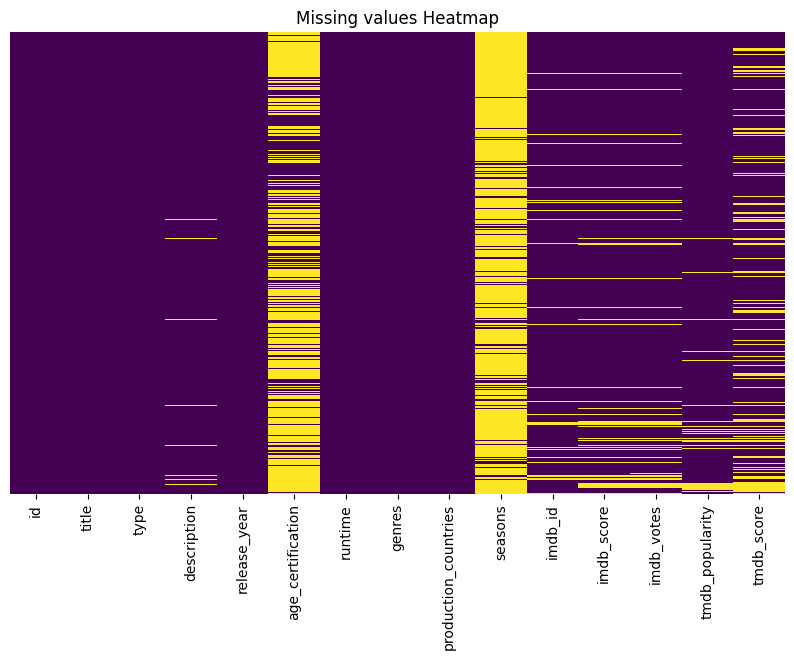

In [13]:
# Visualizing the missing values in Titles Data using heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(titles.isnull(), cmap = 'viridis',cbar = False, yticklabels = False)
plt.title('Missing values Heatmap')

Text(0.5, 1.0, 'Missing values Heatmap')

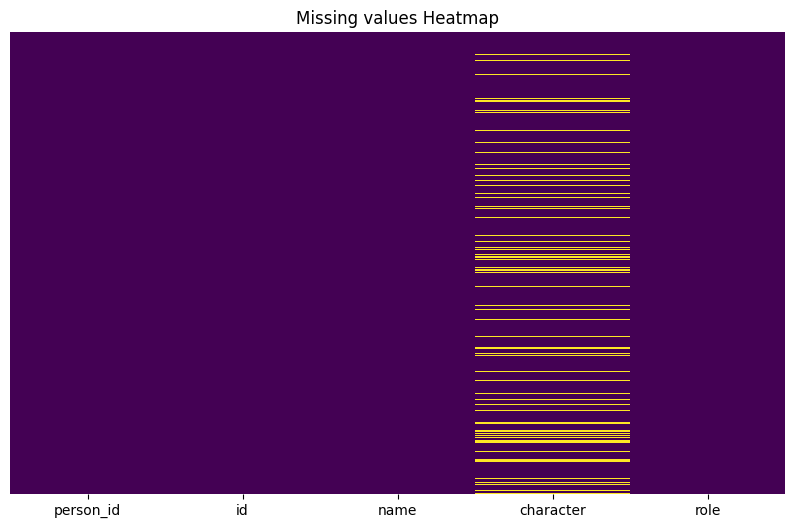

In [14]:
# Visualizing the missing values in Credits Data using heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(credits.isnull(), cmap = 'viridis',cbar = False, yticklabels = False)
plt.title('Missing values Heatmap')

# What did you know about your dataset?

**Dataset Overview:**

The dataset used in this project comes from Amazon Prime Video’s catalog (U.S. region). It originally consisted of two raw files: titles.csv and credits.csv, which were cleaned, transformed, and merged into a consolidated dataframe named df.


**Dataset Size & Structure:**

Titles Dataset: 9,871 unique shows and movies with 15 attributes.

Credits Dataset: 124,235 records of cast and crew with 5 attributes.

Final Dataframe (df): Combines both datasets, enabling title-level and person-level insights.


**Types of Variables:**

Categorical Variables:
Content type (Movie/Show), Age Certification, Genres, Production Countries, Role (Actor/Director).


**Numerical Variables:**

Release Year, Runtime, Number of Seasons, IMDb/TMDB Ratings, IMDb Votes, TMDB Popularity.


**Text Variables:**

Title, Description, Name, Character.


**Content Composition:**

The catalog includes both movies and TV shows.

Genres include Drama, Comedy, Action, Thriller, Documentary, and more.

Content originates from multiple production countries, with the U.S. being dominant.


**Ratings & Popularity:**

Most titles contain IMDb and TMDB ratings, enabling assessments of audience reception.

TMDB popularity scores help track trending content.


**Cast & Crew Data:**

The credits dataset links actors and directors to titles.

Enables identification of frequent actors/directors and collaboration patterns.


**Data Quality & Cleaning:**

Raw datasets included missing values, outliers, and inconsistencies (missing runtimes, null age certifications, duplicated records).


**Wrangling steps included:**

Handling null values by imputation or removal

Removing or capping outliers (runtime and rating extremes)

Standardising categorical variables (genres, countries)

Merging duplicates and harmonising values across datasets


**Final Dataset (df):**

The final dataframe is structured and reliable, containing:

Title metadata (name, type, genres, ratings, popularity)

Credits metadata (actors, directors, roles)


It provides a complete foundation for Exploratory Data Analysis (EDA) and deeper business insights.

# **2. Understanding Your Variables**

In [15]:
# Dataset Columns
print('Titles Dataset Columns:\n')
print(titles.columns)
print('----------------')
print('Credits Dataset Columns:\n')
print(credits.columns)

Titles Dataset Columns:

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')
----------------
Credits Dataset Columns:

Index(['person_id', 'id', 'name', 'character', 'role'], dtype='object')


In [16]:
# Dataset Describe
print('Titles Dataset Describe:\n')
print(titles.describe())
print('----------------')
print('Credits Dataset Describe:\n')
print(credits.describe(include = 'all'))

Titles Dataset Describe:

       release_year      runtime      seasons   imdb_score    imdb_votes  \
count   9871.000000  9871.000000  1357.000000  8850.000000  8.840000e+03   
mean    2001.327221    85.973052     2.791452     5.976395  8.533614e+03   
std       25.810071    33.512466     4.148958     1.343842  4.592015e+04   
min     1912.000000     1.000000     1.000000     1.100000  5.000000e+00   
25%     1995.500000    65.000000     1.000000     5.100000  1.170000e+02   
50%     2014.000000    89.000000     1.000000     6.100000  4.625000e+02   
75%     2018.000000   102.000000     3.000000     6.900000  2.236250e+03   
max     2022.000000   549.000000    51.000000     9.900000  1.133692e+06   

       tmdb_popularity   tmdb_score  
count      9324.000000  7789.000000  
mean          6.910204     5.984247  
std          30.004098     1.517986  
min           0.000011     0.800000  
25%           1.232000     5.100000  
50%           2.536000     6.000000  
75%           5.634000 

## **Variables Description**

The dataset consists of two files — titles.csv and credits.csv — which were merged into a consolidated dataframe (df) for analysis. Below is the description of the key variables:

**Titles Dataset (titles.csv)**

Contains metadata of TV shows and movies available on Amazon Prime.

- id : Unique identifier of the title (`on JustWatch`).

- title : Name of the movie or TV show.

- type : Content type: Movie or TV Show.

- description : Brief synopsis of the title.

- release_year : Year in which the title was released.

- age_certification : Age rating (`e.g., PG, R, 18+`).

- runtime : Duration of the movie or average length of an episode (`in minutes`).

- genres : List of genres (`Drama, Comedy, Action, etc.`).

- production_countries : Countries involved in producing the title.

- seasons : Number of seasons (`only for TV shows`).

- imdb_id : Unique IMDb identifier.

- imdb_score : IMDb rating score (`0–10`).

- imdb_votes : Number of IMDb user votes.

- tmdb_popularity : Popularity score from TMDB.

- tmdb_score : TMDB rating score.

**Credits Dataset (credits.csv)**

Contains cast and crew details for each title.

- person_id : Unique identifier for an actor/director.

- id : Title ID (`to link with titles dataset`).

- name : Name of the person (`actor or director`).

- character : Character played (`if actor`).

- role : Role in the production (`ACTOR or DIRECTOR`).

## **Check Unique Values for each variable**

In [17]:
#Check count of unique values for each variable
print('Count of unique values in Titles Dataset--------')
for col in titles.columns:
  count = titles[col].nunique()
  print(f'{col} : {count}')

print('----------------')

print('Count of unique values in Credits Dataset')
for col in credits.columns:
  count = credits[col].nunique()
  print(f'{col} : {count}')

Count of unique values in Titles Dataset--------
id : 9868
title : 9737
type : 2
description : 9734
release_year : 110
age_certification : 11
runtime : 207
genres : 2028
production_countries : 497
seasons : 32
imdb_id : 9201
imdb_score : 86
imdb_votes : 3650
tmdb_popularity : 5325
tmdb_score : 89
----------------
Count of unique values in Credits Dataset
person_id : 80508
id : 8861
name : 79758
character : 71097
role : 2


In [18]:
# Check Unique Values for each variable.
print('Unique Values in Titles Dataset-------')
for col in titles.columns:
  print(f"{col} : {titles[col].unique()}")


Unique Values in Titles Dataset-------
id : ['ts20945' 'tm19248' 'tm82253' ... 'tm847725' 'tm1054116' 'ts275838']
title : ['The Three Stooges' 'The General' 'The Best Years of Our Lives' ...
 'Chasing' 'Baikunth' 'Waking Up Eighty']
type : ['SHOW' 'MOVIE']
description : ["The Three Stooges were an American vaudeville and comedy team active from 1922 until 1970, best known for their 190 short subject films by Columbia Pictures that have been regularly airing on television since 1958. Their hallmark was physical farce and slapstick. In films, the stooges were commonly known by their actual first names. There were a total of six stooges over the act's run (with only three active at any given time), but Moe Howard and Larry Fine were the mainstays throughout the ensemble's nearly fifty-year run."
 "During America’s Civil War, Union spies steal engineer Johnnie Gray's beloved locomotive, 'The General'—with Johnnie's lady love aboard an attached boxcar—and he single-handedly must do all in h

In [19]:
print('Unique values in Credits Dataset--------')
for col in credits.columns:
  print(f'{col} : {credits[col].unique()}')

Unique values in Credits Dataset--------
person_id : [  59401   31460   31461 ... 1938565  728899 1938620]
id : ['ts20945' 'tm19248' 'tm82253' ... 'tm1079144' 'tm847725' 'tm1054116']
name : ['Joe Besser' 'Moe Howard' 'Larry Fine' ... 'Vijay Thakur' 'Vanya Wellens'
 'Vishwa Bhanu']
character : ['Joe' 'Moe' 'Larry' ... 'Sanjay Thakur' 'Budhiya' 'Gissu']
role : ['ACTOR' 'DIRECTOR']


# **3. Data Wrangling**

## Initial Preprocessing

In [20]:
#Remove Duplicated Values
try:
  titles.drop_duplicates(inplace = True)
  credits.drop_duplicates(inplace = True)
except Exception as e:
  print('Could not delete duplicates')

In [21]:
print('Duplicate Count after processing')
print(f'Duplicate count in Titles Dataset: {titles.duplicated().sum()}')
print('-----------')
print(f'Duplicate count in Credits Dataset: {credits.duplicated().sum()}')

Duplicate Count after processing
Duplicate count in Titles Dataset: 0
-----------
Duplicate count in Credits Dataset: 0


## Drop columns with 70% or more null values

In [22]:
#Checking % of null values for each column

titlesLen = titles.shape[0]
for col in titles.columns:
  null_count = titles[col].isnull().sum()
  print(f'% null values in {col} : {(null_count * 100 / titlesLen):.2f}%')

% null values in id : 0.00%
% null values in title : 0.00%
% null values in type : 0.00%
% null values in description : 1.21%
% null values in release_year : 0.00%
% null values in age_certification : 65.71%
% null values in runtime : 0.00%
% null values in genres : 0.00%
% null values in production_countries : 0.00%
% null values in seasons : 86.25%
% null values in imdb_id : 6.76%
% null values in imdb_score : 10.35%
% null values in imdb_votes : 10.45%
% null values in tmdb_popularity : 5.54%
% null values in tmdb_score : 21.08%


In [23]:
#We can see that seasons column has more than 70% null values
#So we will drop these columns

try:
  titles = titles.drop(columns = ['seasons'])
except Exception as e:
  print(f'Error dropping columns')

In [24]:
#Remaining columns after dropping seasons
titles.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score'],
      dtype='object')

In [25]:
#Check Null values in other columns for insights
titles[titles['description'].isnull() & titles['imdb_score'].isnull() & titles['imdb_votes'].isnull() & titles['tmdb_popularity'].isnull() & titles['tmdb_score'].isnull()]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
672,tm582037,Ye Shang Hai,MOVIE,NaN,1941,NaN,62,['drama'],[],tt3594666,NaN,NaN,NaN,NaN
1661,tm544335,Dhonni Meye,MOVIE,NaN,1975,NaN,133,['drama'],[],tt5526358,NaN,NaN,NaN,NaN
1804,tm526015,Veera Thirumagan,MOVIE,NaN,1962,NaN,156,[],[],tt6548522,NaN,NaN,NaN,NaN
1807,tm682750,Ram Joshi,MOVIE,NaN,1974,NaN,114,[],[],tt10147396,NaN,NaN,NaN,NaN
3910,tm1060920,Yakov Smirnoff: Jokes from the Folks,MOVIE,NaN,2004,NaN,45,['comedy'],[],tt14674970,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9781,tm1056635,Rick Overton's Set List,MOVIE,NaN,2021,NaN,69,['comedy'],[],tt14468412,NaN,NaN,NaN,NaN
9794,tm1084026,Leighann Lord: I Mean Business,MOVIE,NaN,2021,NaN,25,['comedy'],[],tt15076598,NaN,NaN,NaN,NaN
9800,ts344471,Day Ones,SHOW,NaN,2021,NaN,25,['drama'],[],tt18383602,NaN,NaN,NaN,NaN
9816,tm1060910,Erik Terrell: Live at the Helium Comedy Club,MOVIE,NaN,2021,NaN,31,['comedy'],['XX'],tt14674850,NaN,NaN,NaN,NaN


In [27]:
#Since we can see that there are 69 rows with all null column values
# We can drop these rows as well

rowIndex = list(titles[titles['description'].isnull() & titles['imdb_score'].isnull() & titles['imdb_votes'].isnull() & titles['tmdb_popularity'].isnull() & titles['tmdb_score'].isnull()].index)
titles = titles.drop(index= rowIndex)

## **Cleaning of Columns:**

## Clean Description Column

In [28]:
#Since we cannot use any statistical method to fill null values for description column, we will instead fill it with 'Unknown'
#This will help us to keep track for further processing and analysis

titles['description'] = titles['description'].fillna('Unknown')

In [29]:
titles['description'].isnull().sum()

np.int64(0)

## Clean Age-Certification Column

In [30]:
# We will fill the null values with 'Unknown'
# The remaining values will give us insights to analyse this column
# Cleaning any leading/trailig whitespaces as well

titles['age_certification'] = titles['age_certification'].fillna('Unknown').str.strip()


In [31]:
titles['age_certification'].isnull().sum()

np.int64(0)

## Clean Imdb-ID Column

In [32]:
# We will fill the null values with 'Unknown'
# Cleaning any leading/trailig whitespaces as well

titles['imdb_id'] = titles['imdb_id'].fillna('Unknown').str.strip()

In [33]:
titles['imdb_id'].isnull().sum()

np.int64(0)

## Clean imdb score

In [34]:
#Check DataType of the imdb column to use appropriate statistical model
titles['imdb_score'].dtype

dtype('float64')

In [35]:
#Check the skewness of the column
titles['imdb_score'].skew()

np.float64(-0.3595900258306863)

<Axes: title={'center': 'Visualization of imdb_score (includes Null)'}, xlabel='imdb_score', ylabel='Count'>

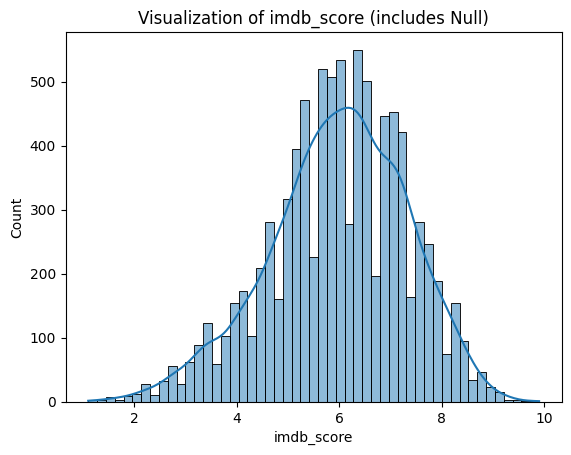

In [36]:
#The column data is normally skewed, visualizing this through a histogram
plt.title('Visualization of imdb_score (includes Null)')
sns.histplot(data = titles, x = 'imdb_score', kde = True)

In [37]:
titles["type"].head()

,type
0,SHOW
1,MOVIE
2,MOVIE
3,MOVIE
4,MOVIE


In [38]:
#Using mean on groupby 'type' column to fill null values
titles['imdb_score'] = titles['imdb_score'].fillna(titles.groupby('type')['imdb_score'].transform('mean'))

In [39]:
#Rounding the mean values to 2 decimal places
titles['imdb_score'] = titles['imdb_score'].apply(lambda x: round(x,2))

In [40]:
titles['imdb_score'].isnull().sum()

np.int64(0)

## Clean imdb_votes

In [41]:
#Check column datatype
titles['imdb_votes'].dtype

dtype('float64')

In [42]:
#Check column skewness
titles['imdb_score'].skew()

np.float64(-0.37369011870635715)

<Axes: title={'center': 'Visualization of imdb_votes (includes null)'}, xlabel='imdb_votes', ylabel='Count'>

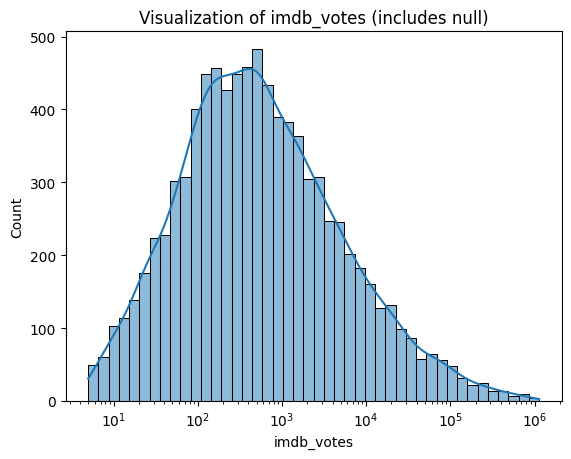

In [43]:
#Visualising column skewness through histplot
plt.title('Visualization of imdb_votes (includes null)')
plt.xscale("log")
sns.histplot(data = titles, x = 'imdb_votes', kde = True)


In [44]:
#Column is normally skewed, so we fill the values with mean
titles['imdb_votes'] = titles['imdb_votes'].fillna(titles.groupby('type')['imdb_votes'].transform('mean'))

In [45]:
titles['imdb_votes'].isnull().sum()

np.int64(0)

In [46]:
#Since votes cannot be in fraction, we will convert this column datatype to int
titles['imdb_votes'] = titles['imdb_votes'].astype(int)

## Clean tmdb_popularity

In [47]:
titles['tmdb_popularity'].dtype

dtype('float64')

In [48]:
#Check column skewness
titles['tmdb_popularity'].skew()

np.float64(26.77120679871341)

<Axes: title={'center': 'Visualization of tmdb_popularity (includes Null)'}, xlabel='tmdb_popularity', ylabel='Count'>

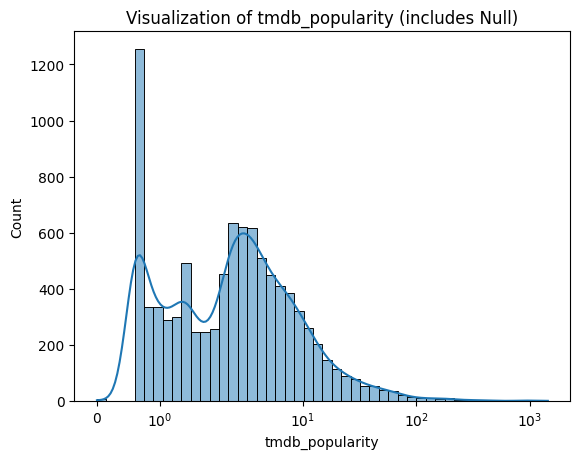

In [49]:
#The column values are right skewed by a large margin
#Visualising it through a histplot

plt.title('Visualization of tmdb_popularity (includes Null)')
plt.xscale("symlog") #Symmetric log scale to visualize wide range of skewed data
sns.histplot(data = titles, x = 'tmdb_popularity', kde = True)

In [50]:
titles['tmdb_popularity'].isnull().sum()

np.int64(478)

In [51]:
#Since the column is right skewed
#We will fill the null values with median within each type group

titles['tmdb_popularity'] = titles['tmdb_popularity'].fillna(titles.groupby('type')['tmdb_popularity'].transform('median'))

In [52]:
#After cleaning null values
print(titles['tmdb_popularity'].isnull().sum())
print('-----------------')
print('tmdb_popularity values after processing null values')
print(titles['tmdb_popularity'].head(10))

0
-----------------
tmdb_popularity values after processing null values
0    15.424
1     8.647
2     8.435
3    11.270
4     8.273
5    11.786
6    26.495
7     7.757
8     8.633
9     3.748
Name: tmdb_popularity, dtype: float64


## Clean tmdb_score

In [53]:
titles['tmdb_score'].isnull().sum()

np.int64(2011)

In [54]:
#Find skewness of the tmdb_score column
titles['tmdb_score'].skew()

np.float64(-0.33482152530934456)

<Axes: title={'center': 'Visualising tmdb_score (Includes Null)'}, xlabel='tmdb_score', ylabel='Count'>

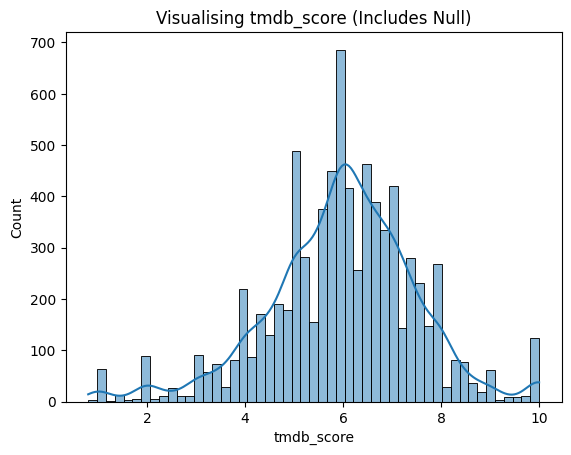

In [55]:
#Visualising skewness through histplot
plt.title("Visualising tmdb_score (Includes Null)")
sns.histplot(data = titles, x ='tmdb_score', kde = True)

In [56]:
#Tmdb_score is normally skewed so we replace the null values with mean based on type
titles['tmdb_score'] = titles['tmdb_score'].fillna(titles.groupby('type')['tmdb_score'].transform('mean'))

In [57]:
titles['tmdb_score'].isnull().sum()

np.int64(0)

In [58]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9799 entries, 0 to 9870
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9799 non-null   object 
 1   title                 9799 non-null   object 
 2   type                  9799 non-null   object 
 3   description           9799 non-null   object 
 4   release_year          9799 non-null   int64  
 5   age_certification     9799 non-null   object 
 6   runtime               9799 non-null   int64  
 7   genres                9799 non-null   object 
 8   production_countries  9799 non-null   object 
 9   imdb_id               9799 non-null   object 
 10  imdb_score            9799 non-null   float64
 11  imdb_votes            9799 non-null   int64  
 12  tmdb_popularity       9799 non-null   float64
 13  tmdb_score            9799 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 1.1+ MB


## **Preprocess Credits Dataset**

## Clean Character Column

In [59]:
credits.isnull().sum()

,0
person_id,0
id,0
name,0
character,16277
role,0


In [60]:
# Filling the null character values with Unknown
credits['character'] = credits['character'].fillna('Unknown')

In [61]:
titles.isnull().sum()

,0
id,0
title,0
type,0
description,0
release_year,0
age_certification,0
runtime,0
genres,0
production_countries,0
imdb_id,0


In [62]:
credits.isnull().sum()

,0
person_id,0
id,0
name,0
character,0
role,0


## Merging Titles and Credits Dataset on common 'id' column

In [63]:
titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],tt0850645,8.6,1092,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,Unknown,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],tt0017925,8.2,89766,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,Unknown,171,"['romance', 'war', 'drama']",['US'],tt0036868,8.1,63026,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,Unknown,92,"['comedy', 'drama', 'romance']",['US'],tt0032599,7.8,57835,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,Unknown,94,"['thriller', 'drama', 'romance']",['US'],tt0042593,7.9,30924,8.273,7.6


In [64]:
credits.head()

,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR


In [65]:
#Now that both the dataset is clean, we can merge them on common 'id' column for final analysis and visualization
#We will merge on Left Outer Join, keeping all the values from titles dataset and matching values from credits dataset

ct_dataset = pd.merge(titles, credits, how = 'left', on = 'id')

In [66]:
ct_dataset.shape

(125117, 18)

In [67]:
#First look of merged dataset

ct_dataset.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],tt0850645,8.6,1092,15.424,7.6,59401.0,Joe Besser,Joe,ACTOR
1,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],tt0850645,8.6,1092,15.424,7.6,31460.0,Moe Howard,Moe,ACTOR
2,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],tt0850645,8.6,1092,15.424,7.6,31461.0,Larry Fine,Larry,ACTOR
3,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,Unknown,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],tt0017925,8.2,89766,8.647,8.0,21174.0,Buster Keaton,Johnny Gray,ACTOR
4,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,Unknown,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],tt0017925,8.2,89766,8.647,8.0,28713.0,Marion Mack,Annabelle Lee,ACTOR


In [68]:
# Checking for any null values after merging
ct_dataset.isnull().sum()

,0
id,0
title,0
type,0
description,0
release_year,0
age_certification,0
runtime,0
genres,0
production_countries,0
imdb_id,0


In [69]:
ct_dataset["release_year"].dtype

dtype('int64')

In [70]:
# First look at the null data

ct_dataset[ct_dataset['person_id'].isnull() & ct_dataset['name'].isnull() & ct_dataset['character'].isnull() & ct_dataset['role'].isnull()]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
2063,tm348419,Payoff in the Pacific,MOVIE,A documentary on .S. efforts against the Japan...,1945,Unknown,56,[],[],Unknown,5.80,8278,0.6000,5.792554,NaN,NaN,NaN,NaN
7531,tm18966,D-Day: The Normandy Invasion,MOVIE,Focusing on both the strategic overview of the...,1945,Unknown,21,[],[],Unknown,5.80,8278,0.6000,8.000000,NaN,NaN,NaN,NaN
13109,tm686160,Peculiar Pets,MOVIE,"In this documentary, we meet the families whom...",1921,Unknown,47,['documentation'],[],tt0981329,5.80,8278,2.3925,5.792554,NaN,NaN,NaN,NaN
14043,tm769632,Sri Valli,MOVIE,"Valli, a tribal girl falls in love with Muruga...",1945,Unknown,114,['drama'],[],tt0240922,5.80,8278,2.3925,5.792554,NaN,NaN,NaN,NaN
14122,tm808043,Death Valley,MOVIE,A fortunate young man discovers gold and is th...,1927,Unknown,60,"['western', 'drama']",['XX'],tt0017796,6.90,10,2.3925,5.792554,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125051,tm1084430,Parigettu Parigettu,MOVIE,When Ajay's world comes crashing down due to d...,2021,Unknown,130,"['thriller', 'crime']",[],tt15094256,7.30,1292,2.3925,5.792554,NaN,NaN,NaN,NaN
125079,tm1090675,Burning Man: The Musical,MOVIE,Follow Molly whose billionaire boss plans to d...,2021,Unknown,74,[],[],tt15194208,7.40,231,0.6000,5.792554,NaN,NaN,NaN,NaN
125080,tm1142918,Ty Barnett: Yep,MOVIE,"Ty Barnett, a Chicago native, got his start at...",2021,PG,25,[],[],tt11979448,5.80,8278,0.6000,5.800000,NaN,NaN,NaN,NaN
125097,ts295958,GameOn Titans,SHOW,Eight mobile gamers battle it out in a series ...,2021,Unknown,17,[],[],tt14747014,7.12,10235,5.0720,7.316445,NaN,NaN,NaN,NaN


In [71]:
# From this data we can figure out that several other columns have values such as 'Unknown' or mean / median processed values
# Narrowing the data based on these metrics to possibly drop from the table
temp = ct_dataset[ct_dataset['person_id'].isnull() & ct_dataset['name'].isnull() & ct_dataset['character'].isnull() & ct_dataset['role'].isnull()]
temp[(temp['age_certification'] == 'Unknown')]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
2063,tm348419,Payoff in the Pacific,MOVIE,A documentary on .S. efforts against the Japan...,1945,Unknown,56,[],[],Unknown,5.80,8278,0.6000,5.792554,NaN,NaN,NaN,NaN
7531,tm18966,D-Day: The Normandy Invasion,MOVIE,Focusing on both the strategic overview of the...,1945,Unknown,21,[],[],Unknown,5.80,8278,0.6000,8.000000,NaN,NaN,NaN,NaN
13109,tm686160,Peculiar Pets,MOVIE,"In this documentary, we meet the families whom...",1921,Unknown,47,['documentation'],[],tt0981329,5.80,8278,2.3925,5.792554,NaN,NaN,NaN,NaN
14043,tm769632,Sri Valli,MOVIE,"Valli, a tribal girl falls in love with Muruga...",1945,Unknown,114,['drama'],[],tt0240922,5.80,8278,2.3925,5.792554,NaN,NaN,NaN,NaN
14122,tm808043,Death Valley,MOVIE,A fortunate young man discovers gold and is th...,1927,Unknown,60,"['western', 'drama']",['XX'],tt0017796,6.90,10,2.3925,5.792554,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125050,tm1076901,Jaan! Jaan Loge Kya?,MOVIE,Rahul and Sonia are very happy after marriage....,2021,Unknown,114,['drama'],[],tt14954126,3.80,12,0.6000,5.792554,NaN,NaN,NaN,NaN
125051,tm1084430,Parigettu Parigettu,MOVIE,When Ajay's world comes crashing down due to d...,2021,Unknown,130,"['thriller', 'crime']",[],tt15094256,7.30,1292,2.3925,5.792554,NaN,NaN,NaN,NaN
125079,tm1090675,Burning Man: The Musical,MOVIE,Follow Molly whose billionaire boss plans to d...,2021,Unknown,74,[],[],tt15194208,7.40,231,0.6000,5.792554,NaN,NaN,NaN,NaN
125097,ts295958,GameOn Titans,SHOW,Eight mobile gamers battle it out in a series ...,2021,Unknown,17,[],[],tt14747014,7.12,10235,5.0720,7.316445,NaN,NaN,NaN,NaN


In [72]:
# Checking if there are any duplicate values in the merged dataset
ct_dataset.duplicated().sum()

np.int64(0)

In [73]:
# Removing rows where most values are NAN and other columns are 'Unknown'
rows = temp[(temp['age_certification'] == 'Unknown')].index
ct_dataset.drop(index = rows, inplace = True)

## Filling Null values in merged dataset with 'Unknown' since these are categorical data

In [74]:
# Final processing
# Applying directly to all the null column values

df = ct_dataset.fillna('Unknown')

In [75]:
# Last check for any null values
df.isnull().sum()

,0
id,0
title,0
type,0
description,0
release_year,0
age_certification,0
runtime,0
genres,0
production_countries,0
imdb_id,0


## **Remove Outliers**

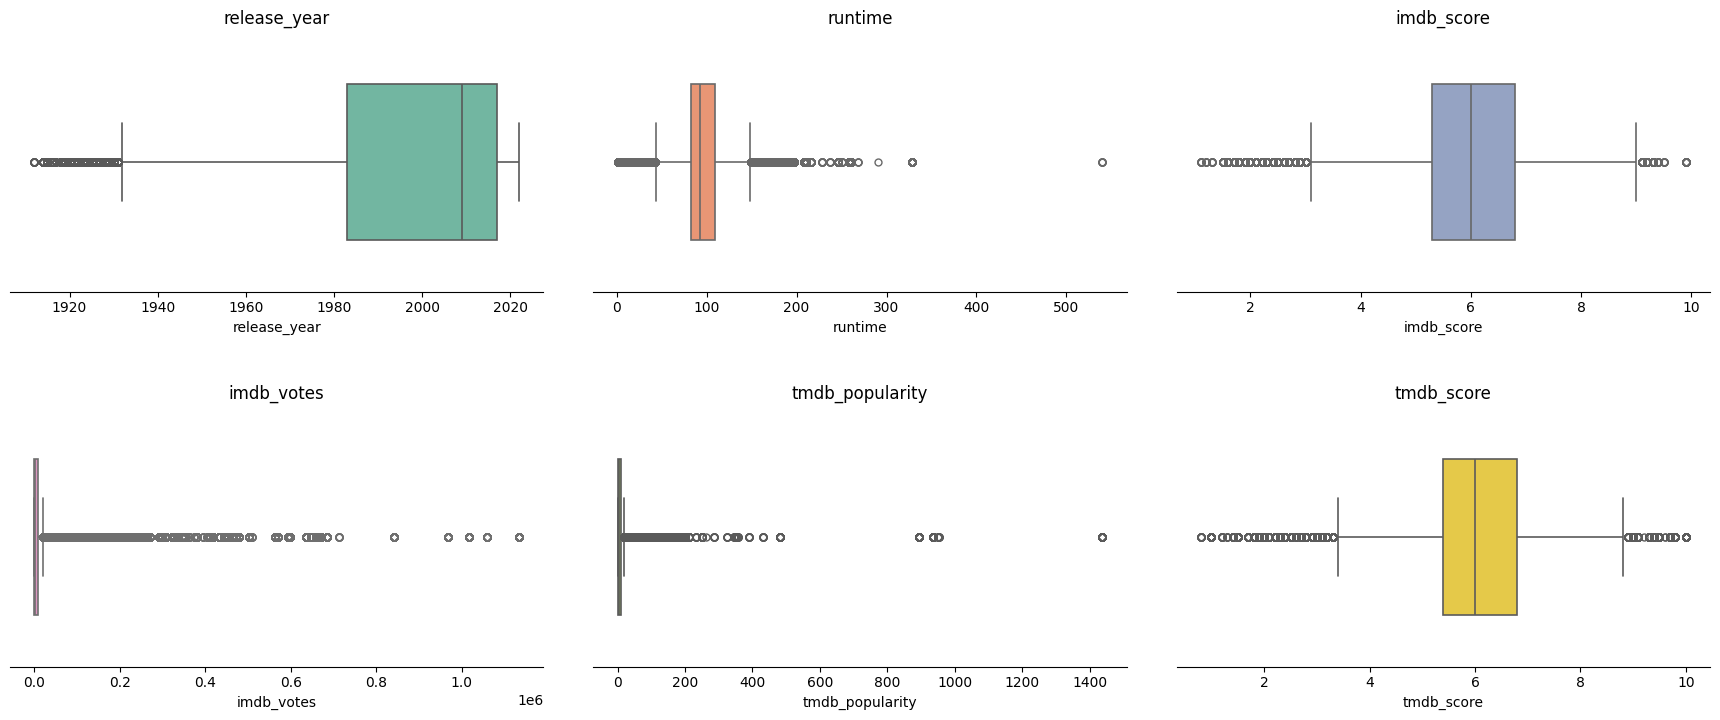

In [76]:
#Outlier visualisation code using Box Plot
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Get numeric columns
numeric_cols = df.select_dtypes(include='number').columns.tolist()
num_cols = len(numeric_cols)

# Compute number of rows needed, 3 plots per row
n_cols_per_row = 3
n_rows = (num_cols + n_cols_per_row - 1) // n_cols_per_row

# Create subplots grid
fig, axes = plt.subplots(n_rows, n_cols_per_row, figsize=(6 * n_cols_per_row, 4 * n_rows), squeeze=False)

# Flatten axes for easy indexing
axes_flat = axes.flatten()

# Set Seaborn style
sns.set(style="whitegrid")

# Use a color palette
colors = sns.color_palette("Set2", num_cols)  # Enough colors for all plots

for idx, col in enumerate(numeric_cols):
    ax = axes_flat[idx]
    sns.boxplot(
        x=df[col],
        orient='h',
        ax=ax,
        width=0.6,
        whis=1.5,
        fliersize=5,
        linewidth=1.2,
        color=colors[idx]  # Use color instead of palette to avoid warning
    )
    ax.set_title(col, fontsize=12)
    ax.set_yticks([])         # Hide y-axis ticks
    sns.despine(ax=ax, left=True)

# Turn off unused subplots, if any
for idx in range(num_cols, len(axes_flat)):
    fig.delaxes(axes_flat[idx])

plt.tight_layout(pad=3)
plt.show()

In [77]:
#Outlier Removal code based on IQR
#MARK
import pandas as pd

def remove_outliers_iqr(df):
    df_clean = df.copy()
    num_cols = df_clean.select_dtypes(include='number').columns

    for col in num_cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Keep only rows within bounds
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

    return df_clean

# Apply function
df_cleaned = remove_outliers_iqr(df)


print("Original shape:", df.shape)
df = remove_outliers_iqr(df)

Original shape: (124322, 18)


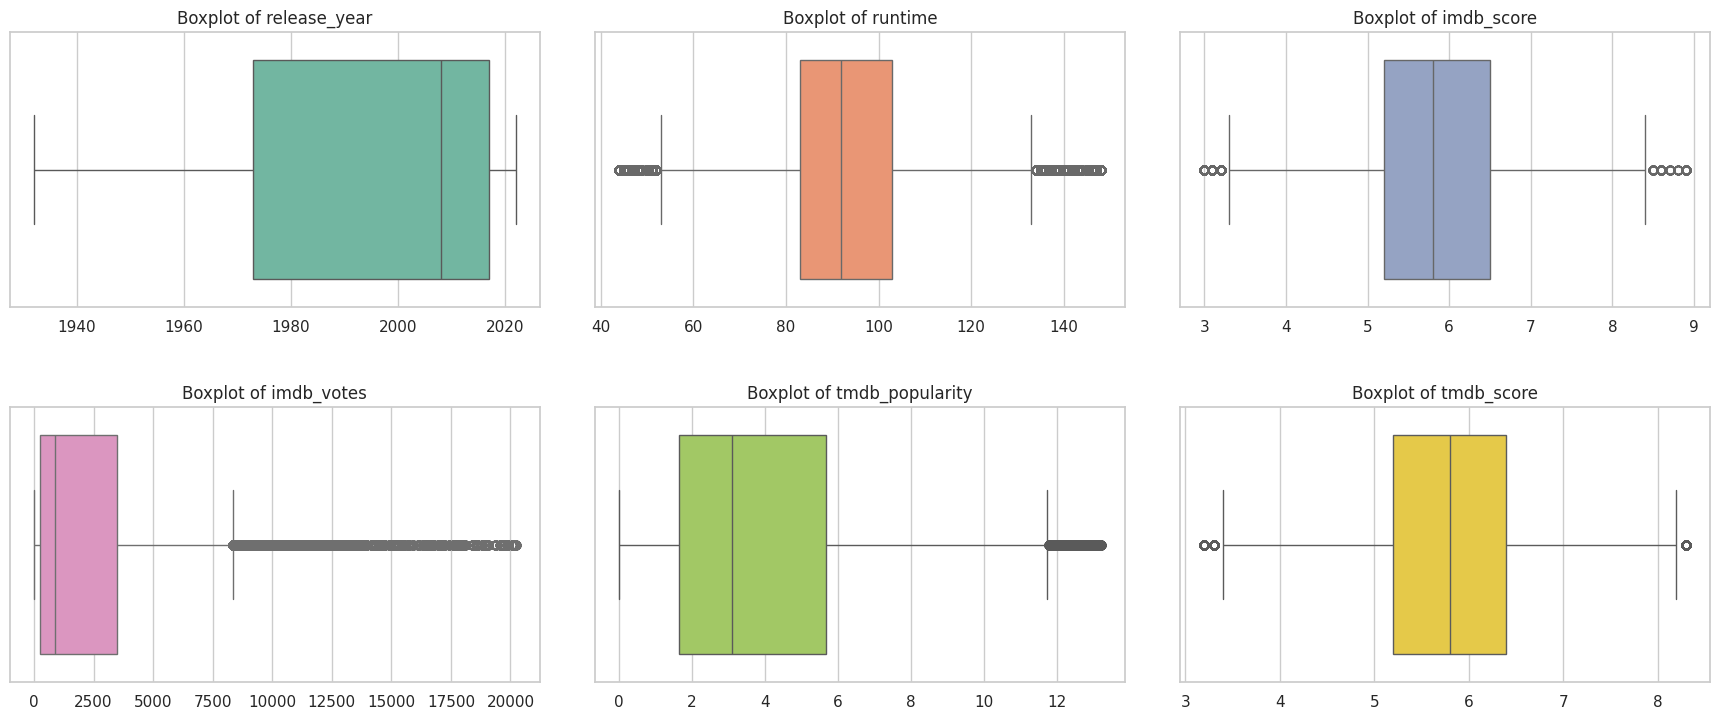

In [78]:
#Box plot Visualization after removal of Outliers

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select numeric columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()

# Define subplot layout: 3 plots per row
n_cols = 3
n_rows = int(np.ceil(len(num_cols) / n_cols))

# Seaborn style and color palette
sns.set(style="whitegrid")
colors = sns.color_palette("Set2", len(num_cols))

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 4 * n_rows))
axes = axes.flatten()  # Flatten in case of multiple rows

# Plot each numeric column as horizontal boxplot
for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=axes[i], color=colors[i], orient='h')
    axes[i].set_title(f'Boxplot of {col}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=3)  # Good spacing between subplots
plt.show()

## What all manipulations have you done and insights you found?

**Data Manipulations Performed**

To ensure the dataset was ready for analysis, several data cleaning and transformation steps were performed:

**Merging Datasets**

Combined the titles dataset (titles.csv) and credits dataset (credits.csv) on the common key (id).
Resulted in a consolidated dataframe containing both title-level metadata and cast/crew details.

**Handling Missing Values**

Removed duplicate entries

Imputed or dropped missing values for fields like description, runtime, age certification, and ratings
(imdb_score, tmdb_score)

**Outlier Treatment**

Identified and removed outliers in runtime, ratings, and popularity scores using the IQR method

Ensured unrealistic entries (e.g., extremely high runtimes) were corrected or excluded

**Data Standardization**

Normalized categorical variables such as genres, production countries, and age certification

Set id as a unique index where appropriate

**Feature Engineering**

Derived year-wise distributions of titles

Classified content into Movies vs. TV Shows

Counted actor/director frequency to study cast/crew prominence

**Visualization & EDA**

Created box plots, bar plots, violin plots, treemaps, bubble plots, heatmaps, pie/donut charts, and correlation plots using Seaborn and Plotly for interactivity.

**Insights Found & Content Composition**

Amazon Prime hosts more movies than TV shows

Drama, Comedy, and Action dominate the catalog, while niche genres appear less frequently

**Trends Over Time**

Content releases increased significantly after 2010, reflecting platform growth

Recent years show diversity in genres and international productions

**Regional Distribution**

Majority of titles are produced in the United States

India, the UK, and Canada contribute a strong number of titles as well

**Runtime Analysis**

Movies generally range between 90 and 120 minutes

Extreme runtimes were removed during cleaning

**Audience Ratings & Popularity**

Higher IMDb/TMDB ratings correlate with higher popularity values

A few poorly rated titles still receive high popularity due to external influences

**Age Certification**

A large share of content is rated 18+ or PG-13, indicating a focus on adult and teen audiences

**Cast & Crew Insights**

Frequent actors and directors were extracted from the credits dataset

Some recurring creators are associated with consistently high-rated content

In [79]:
# Save DataFrame as CSV
df.to_csv('mydata.csv', index=False)